In [1]:
import numpy as np
import pandas as pd

In [2]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

In [3]:
ratings.head(2)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [4]:
ratings.shape

(100836, 4)

In [5]:
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [6]:
movies.shape

(9742, 3)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [8]:
df = pd.merge(ratings,movies,left_on='movieId' , right_on = 'movieId')

In [9]:
df.shape

(100836, 6)

In [10]:
df.head(2)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


# Grouping top data based on the ratings

In [11]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

# Grouping data on based on number of reviews received 

In [13]:

df.groupby('title')['userId'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: userId, dtype: int64

In [14]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


# Visualizing user activity

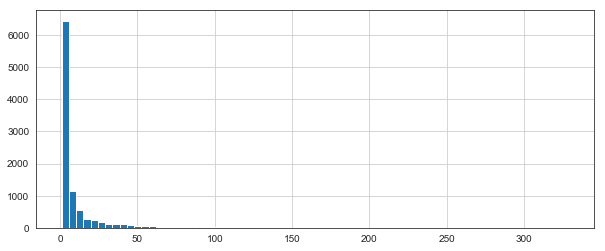

In [24]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

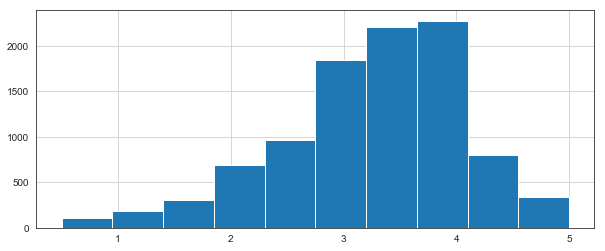

In [22]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=10)

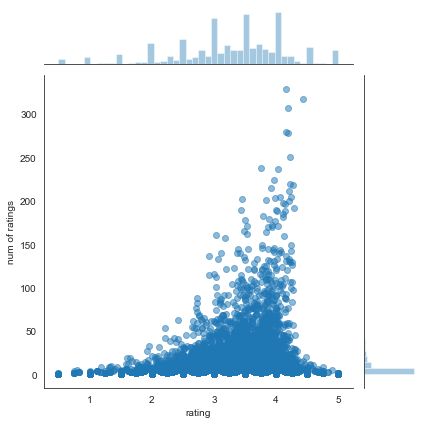

In [25]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

# Recommending Similar Movies

In [27]:
moviemat = df.pivot_table(index='userId',columns='title',values='rating')
moviemat.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
ratings.sort_values(['num of ratings','rating'],ascending=[False,False]).head()

,rating,num of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


In [38]:
#  Let's choose two movies: starwars, a sci-fi movie. And Liar Liar, a comedy.

starwars_user_ratings = moviemat['Star Wars: The Last Jedi (2017)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

In [41]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

In [42]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
(500) Days of Summer (2009),0.646997
10 Cloverfield Lane (2016),0.563621
10 Things I Hate About You (1999),0.987829
101 Dalmatians (1996),-1.000000
101 Dalmatians (One Hundred and One Dalmatians) (1961),1.000000


- Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie).

In [43]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Sleepless in Seattle (1993),1.000000,106
Clerks (1994),1.000000,104
Braveheart (1995),0.969345,237
"Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)",0.960769,110
American Beauty (1999),0.951779,204


- Same approach done for Liar Liar

In [44]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False).head()


,Correlation,num of ratings
title,,
Jumanji (1995),0.659437,110
"Net, The (1995)",0.624401,112
American Pie (1999),0.561693,103
Men in Black (a.k.a. MIB) (1997),0.543301,165
Harry Potter and the Chamber of Secrets (2002),0.508695,102
